I. Load dữ liệu:

1.1. Import:

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from catboost import CatBoostClassifier

import scipy.stats as stats
import xgboost as xgb
from sklearn.model_selection import KFold
from IPython.display import HTML, display
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA


1.2. Load dataset:

In [2]:
df = pd.read_csv( "Breast Cancer Wisconsin.csv")

1.3. Show dữ liệu:

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


1.4. Show số cột, hàng:

In [4]:
df.shape

(569, 33)

1.5. Show kiểu:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

II. Clean data:

2.1. Bỏ cột:

In [6]:
df = df.drop(columns=["Unnamed: 32","id"])
df.shape

(569, 31)

2.2. Check null:

In [7]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

2.3. Check duplicated:

In [8]:
df.duplicated().sum()

0

III. Meaningful:

2.1. Identifying the unique number of values in the dataset:

In [9]:
df.nunique()

diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: int64

2.2. Viewing the data statistics:

In [10]:
df.describe().T.style.bar(subset=['mean'], color='#205ff2')\
                            .background_gradient(subset=['std'], cmap='Reds')\
                            .background_gradient(subset=['50%'], cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.000000,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.110000
texture_mean,569.000000,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.280000
perimeter_mean,569.000000,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.500000
area_mean,569.000000,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.000000
smoothness_mean,569.000000,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.163400
compactness_mean,569.000000,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.345400
concavity_mean,569.000000,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.426800
concave points_mean,569.000000,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.201200
symmetry_mean,569.000000,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.304000
fractal_dimension_mean,569.000000,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.097440


Summary:
- There is high variation in values in area_mean and area_worst.
- There are many variables have min value 0.
- The area_worst feature’s max value is 4254 and fractal_dimension_se features’ max 0.029840. This indicates we need to standardize or normalize data before visualization, feature selection, and classification.

2.3. Thống kê số bệnh nhân ác tính và lành tính:

<Axes: ylabel='count'>

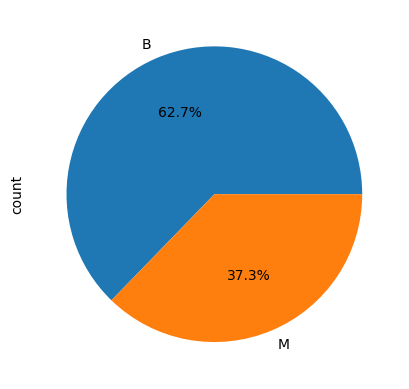

In [11]:
df['diagnosis'].value_counts().plot(kind='pie', autopct="%0.1f%%")

Summary: Bar plot of diagnosis shows that Malignant and Benign patients ratio is 37% (212/569) and 63% (357/569) respectively.
(M = malignant, B = benign)
Benign tumors are noncancerous. Malignant tumors are cancerous.

2.4. Plotting the heatmap of correlation between features

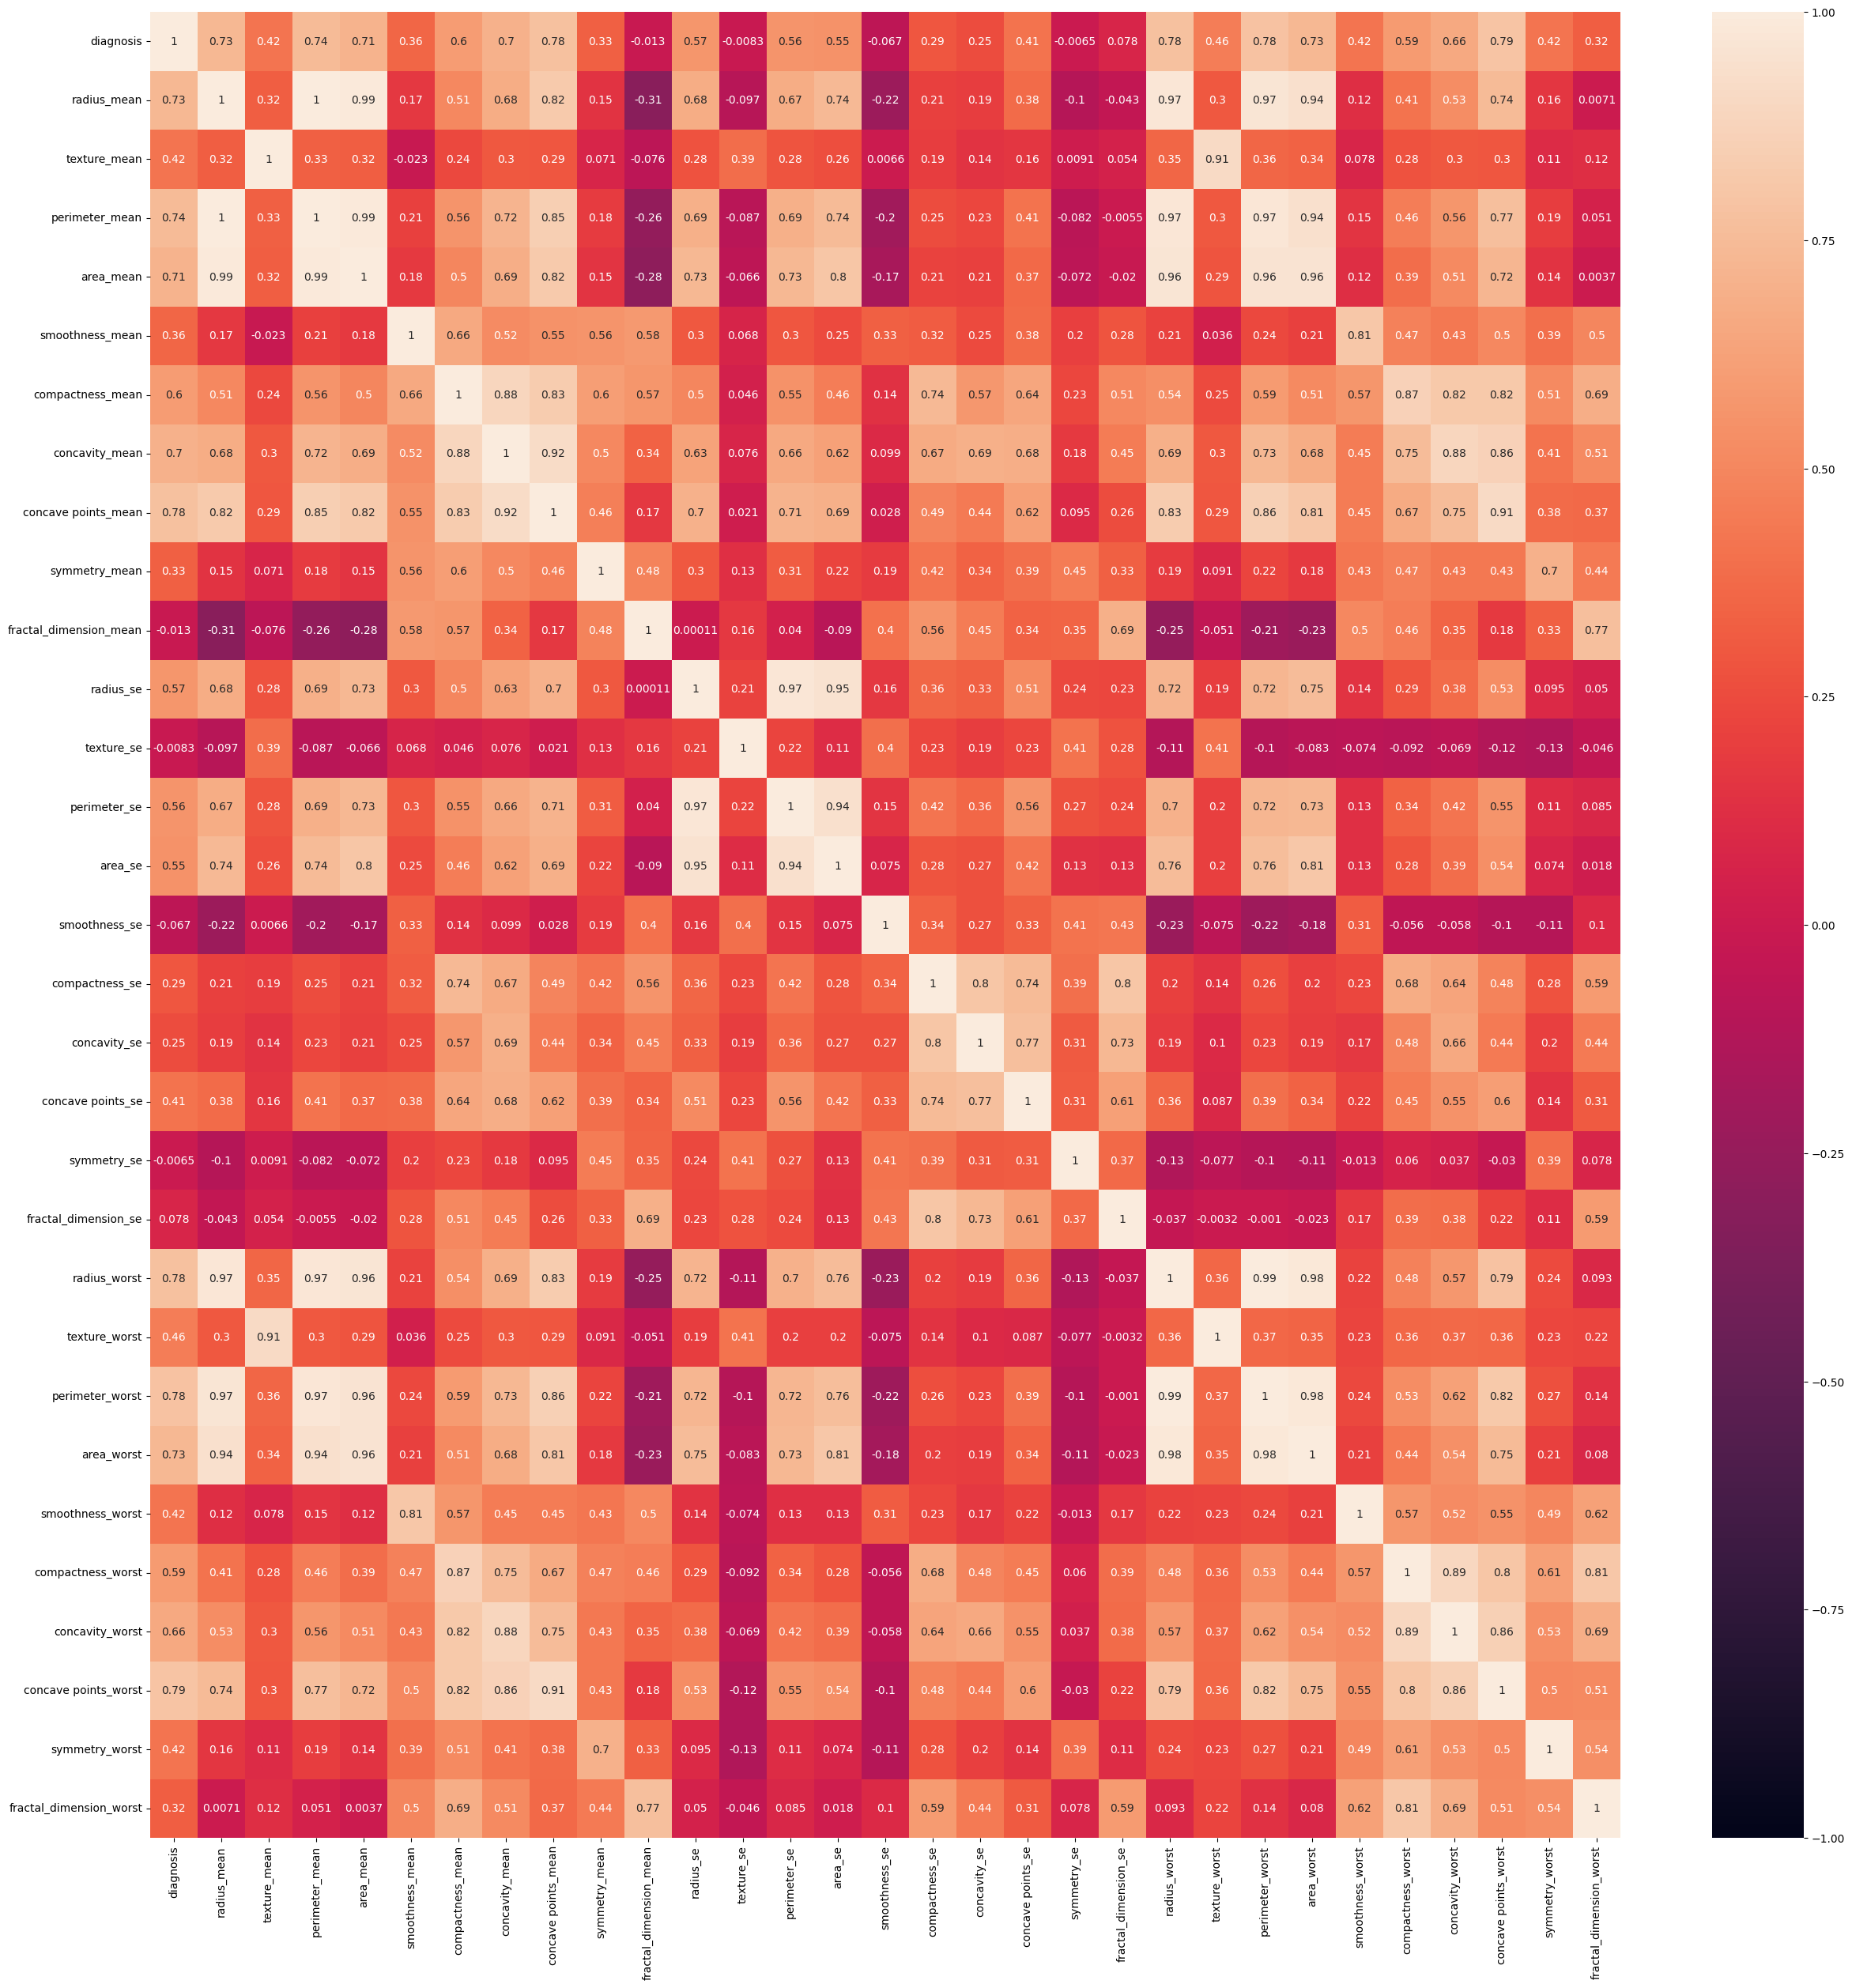

In [31]:
plt.figure(figsize =(30,30))
df_copy = df.replace({'diagnosis': {'M': 1, 'B': 0}})
sns.heatmap(df_copy.corr(numeric_only=True), vmin=-1, vmax=1, annot=True)
plt.show()

Summary:
- Radius, Area and Perimeter are correlated (corr>0.9) which is obvious as area and perimeter is calculated using the radius values.
- Texture_mean and texture_worst are higly correlated with corr_value = 0.98 (texture_worst is the largest value of all the textures).
- Compactness_mean,concavity_mean,concave_points_mean are also highy correlated with values in range 0.7 to 0.9.
- Symmetry_mean and symmetry_worst are correlated too by values 0.7.
- Fractural_dimension_mean and fractural_dimension_worst are correlated by value 0.77
- diagnosis correlated with radius_mean, perimeter_mean,... but the important features is concave poinst_worst

III. Code:

3.1. Drop column:

In [13]:
y = df.loc[:,"diagnosis"].values
X = df.drop(["diagnosis"],axis=1).values

3.2. Split train (90%), test (10%)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1, random_state = 0)
print("Size of training set:", X_train.shape)
print("Size of training set:", X_test.shape)

Size of training set: (512, 30)
Size of training set: (57, 30)


3.3. Scale

In [15]:
sc = StandardScaler()
x_train = sc.fit_transform(X_train)
x_test = sc.transform(X_test)

3.4. Decision tree:

In [16]:
from sklearn.model_selection import GridSearchCV
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_train_pred=dt.predict(X_train)
y_test_pred=dt.predict(X_test)


In [17]:
from sklearn.metrics import accuracy_score
tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)
print(f'''Decision tree train/test accuracies: 
       {tree_train:.3f}/{tree_test:.3f}''')

Decision tree train/test accuracies: 
       1.000/0.895


- The score on the training set is 100%, but the score on the test set is 91% -> This means that our model has an overfitting problem.
- To overcome the overfitting problem, we control the complexity of a tree. Try smaller max_depth (it was set None as default, mean that tree as large as possible).

In [18]:
from sklearn.model_selection import GridSearchCV
dt = DecisionTreeClassifier(random_state = 0)
parameters = {"max_depth":[1, 2, 3, 4, 5, 7, 10],  
              "min_samples_leaf": [1, 3, 6, 10, 20]}
clf = GridSearchCV(dt, parameters, n_jobs= 1)
clf.fit(X_train, y_train)
print(clf.best_params_)

{'max_depth': 5, 'min_samples_leaf': 1}


In [19]:
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)
print(f'''Decision tree train/test accuracies: 
       {tree_train:.3f}/{tree_test:.3f}''')

Decision tree train/test accuracies: 
       0.984/0.930


In [20]:
new_patient_features = np.array([
    17.99,   # mean radius
    10.38,   # mean texture
    122.8,   # mean perimeter
    1001.0,  # mean area
    0.1184,  # mean smoothness
    0.2776,  # mean compactness
    0.3001,  # mean concavity
    0.1471,  # mean concave points
    0.2419,  # mean symmetry
    0.07871, # mean fractal dimension
    1.095,   # radius error
    0.9053,  # texture error
    8.589,   # perimeter error
    153.4,   # area error
    0.006399,  # smoothness error
    0.04904,   # compactness error
    0.05373,   # concavity error
    0.01587,   # concave points error
    0.03003,   # symmetry error
    0.006193,  # fractal dimension error
    25.38,    # worst radius
    17.33,    # worst texture
    184.6,    # worst perimeter
    2019.0,   # worst area
    0.1622,   # worst smoothness
    0.6656,   # worst compactness
    0.7119,   # worst concavity
    0.2654,   # worst concave points
    0.4601,   # worst symmetry
    0.1189    # worst fractal dimension
])

# Reshape để phù hợp với định dạng của mô hình (1 mẫu và 30 đặc trưng)
new_patient_features = new_patient_features.reshape(1, -1)

# Sử dụng mô hình đã tối ưu hóa từ GridSearchCV để đưa ra dự đoán
prediction = clf.predict(new_patient_features)

# In ra dự đoán
print("Predicted class for the new patient:", prediction)

Predicted class for the new patient: ['M']


3.5. Logistic Regression:

In [21]:
logreg = LogisticRegression()

# Train the model using the training sets 
logreg.fit(X_train, y_train)
y_train_pred=logreg.predict(X_train)
y_test_pred=logreg.predict(X_test)
tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)
print(f'''Logistic Regression train/test accuracies: 
       {tree_train:.3f}/{tree_test:.3f}''')

Logistic Regression train/test accuracies: 
       0.955/0.965


C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
prediction = logreg.predict(new_patient_features)
print("Predicted class for the new patient:", prediction)

Predicted class for the new patient: ['M']


3.6. Which is the best for this dataset:

In [23]:
Algorithms = [KNeighborsClassifier(n_neighbors=2),
              RandomForestClassifier(n_estimators=100,random_state=0),
              DecisionTreeClassifier(random_state=42),
              GaussianNB(),LogisticRegression(),
              SVC(kernel="poly", degree=3, C=10.0),
              CatBoostClassifier(verbose=False),
              MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000),
              AdaBoostClassifier(), GaussianProcessClassifier(kernel=RBF()),
              KNeighborsClassifier(n_neighbors=5)
             ]

d = {"Model": ["KNeighborsClassifier","RandomForestClassifier",
               "DecisionTreeClassifier","GaussianNB",
               "LogisticRegression", "SVC", "CatBoostClassifier",
               "MLPClassifier", "AdaBoostClassifier", 
               "GaussianProcessClassifier", "KNeighborsClassifier"
              ], 
     "Accuracy": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    }

# Create a DataFrame to store results
results_df = pd.DataFrame(data = d, index=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9 ,10])

In [24]:
for idx, model in enumerate(Algorithms):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    acc = accuracy_score(y_test, pred)

    # Update value in the DataFrame
    results_df.loc[idx, 'Accuracy'] = acc

C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
results_df

,Model,Accuracy
0,KNeighborsClassifier,0.912281
1,RandomForestClassifier,0.947368
2,DecisionTreeClassifier,0.894737
3,GaussianNB,0.912281
4,LogisticRegression,0.964912
5,SVC,0.947368
6,CatBoostClassifier,0.982456
7,MLPClassifier,0.947368
8,AdaBoostClassifier,0.982456
9,GaussianProcessClassifier,0.929825


3.7. Catboost:

In [26]:
classifier = CatBoostClassifier()
classifier.fit(X_train, y_train)
y_train_pred=classifier.predict(X_train)
y_test_pred=classifier.predict(X_test)
tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)
print(f'''Catboost test accuracies: 
       {tree_test:.3f}''')

Learning rate set to 0.007741
0:	learn: 0.6803361	total: 15.9ms	remaining: 15.9s
1:	learn: 0.6674812	total: 28.1ms	remaining: 14s
2:	learn: 0.6533818	total: 39.7ms	remaining: 13.2s
3:	learn: 0.6416200	total: 53ms	remaining: 13.2s
4:	learn: 0.6283950	total: 69.2ms	remaining: 13.8s
5:	learn: 0.6184404	total: 82ms	remaining: 13.6s
6:	learn: 0.6065497	total: 95.9ms	remaining: 13.6s
7:	learn: 0.5950451	total: 111ms	remaining: 13.8s
8:	learn: 0.5843091	total: 126ms	remaining: 13.9s
9:	learn: 0.5744287	total: 141ms	remaining: 14s
10:	learn: 0.5658808	total: 159ms	remaining: 14.3s
11:	learn: 0.5552071	total: 175ms	remaining: 14.4s
12:	learn: 0.5456829	total: 192ms	remaining: 14.6s
13:	learn: 0.5380373	total: 209ms	remaining: 14.7s
14:	learn: 0.5292151	total: 224ms	remaining: 14.7s
15:	learn: 0.5206658	total: 240ms	remaining: 14.8s
16:	learn: 0.5129863	total: 317ms	remaining: 18.3s
17:	learn: 0.5047902	total: 341ms	remaining: 18.6s
18:	learn: 0.4971966	total: 356ms	remaining: 18.4s
19:	learn: 0

In [27]:
new_patient_features = np.array([
    17.99,   # mean radius
    10.38,   # mean texture
    122.8,   # mean perimeter
    1001.0,  # mean area
    0.1184,  # mean smoothness
    0.2776,  # mean compactness
    0.3001,  # mean concavity
    0.1471,  # mean concave points
    0.2419,  # mean symmetry
    0.07871, # mean fractal dimension
    1.095,   # radius error
    0.9053,  # texture error
    8.589,   # perimeter error
    153.4,   # area error
    0.006399,  # smoothness error
    0.04904,   # compactness error
    0.05373,   # concavity error
    0.01587,   # concave points error
    0.03003,   # symmetry error
    0.006193,  # fractal dimension error
    25.38,    # worst radius
    17.33,    # worst texture
    184.6,    # worst perimeter
    2019.0,   # worst area
    0.1622,   # worst smoothness
    0.6656,   # worst compactness
    0.7119,   # worst concavity
    0.2654,   # worst concave points
    0.4601,   # worst symmetry
    0.1189    # worst fractal dimension
])

# Reshape để phù hợp với định dạng của mô hình (1 mẫu và 30 đặc trưng)
new_patient_features = new_patient_features.reshape(1, -1)

# Sử dụng mô hình đã tối ưu hóa từ GridSearchCV để đưa ra dự đoán
prediction = classifier.predict(new_patient_features)

# In ra dự đoán
print("Predicted class for the new patient:", prediction)

Predicted class for the new patient: ['M']
